In [74]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

import seaborn as sns



import chardet
with open('Most_Streamed_Spotify_Songs_2024.csv', 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']
print(encoding)
#music_data = pd.read_csv('Most_Streamed_Spotify_Songs_2024.csv', encoding=encoding)

In [75]:
movie_data= pd.read_csv('/Users/qian/Desktop/DATA/IMDB-Dataset/movies.csv')
rating_data = pd.read_csv('/Users/qian/Desktop/DATA/IMDB-Dataset/ratings.csv')

### MOVIE Data

In [22]:
movie_data

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy
10327,148626,The Big Short (2015),Drama


In [23]:
len(movie_data['movieId'])

10329

In [27]:
movie_data['year'].sort_values()

10172        
10322        
6587     1902
5143     1915
5262     1916
         ... 
10224    2015
10225    2015
10228    2015
10213    2015
10328    2015
Name: year, Length: 10329, dtype: object

In [28]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   name     10329 non-null  object
 2   year     10329 non-null  object
 3   genres   10329 non-null  object
dtypes: int64(1), object(3)
memory usage: 322.9+ KB


In [29]:
movie_data.isnull().sum()

movieId    0
name       0
year       0
genres     0
dtype: int64

### Movie detail

In [76]:
#separate the name and year
def separate_year(title):
    return title[-5:-1] if title.endswith(')') else None

def separate_name(title):
    return title[:-7] if title.endswith(')') else title

movie_data['year'] = movie_data['title'].apply(separate_year)
movie_data['name'] = movie_data['title'].apply(separate_name)



In [77]:
#drop the original title
movie_data.drop(columns=['title'], inplace=True)

movie_data= movie_data[['movieId','name','year','genres']]
movie_data

,movieId,name,year,genres
0,1,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji,1995,Adventure|Children|Fantasy
2,3,Grumpier Old Men,1995,Comedy|Romance
3,4,Waiting to Exhale,1995,Comedy|Drama|Romance
4,5,Father of the Bride Part II,1995,Comedy
...,...,...,...,...
10324,146684,Cosmic Scrat-tastrophe,2015,Animation|Children|Comedy
10325,146878,Le Grand Restaurant,1966,Comedy
10326,148238,A Very Murray Christmas,2015,Comedy
10327,148626,The Big Short,2015,Drama


In [33]:
movie_data['genres'] = movie_data['genres'].str.split('|')

In [34]:
exploded_movie_data = movie_data.explode('genres')

In [35]:
movie_genres_count = exploded_movie_data['genres'].value_counts()
movie_genres_count

genres
Drama                 5220
Comedy                3515
Thriller              2187
Romance               1788
Action                1737
Crime                 1440
Adventure             1164
Horror                1001
Sci-Fi                 860
Mystery                675
Fantasy                670
Children               540
War                    503
Documentary            415
Musical                409
Animation              401
Western                235
Film-Noir              195
IMAX                   152
(no genres listed)       7
Name: count, dtype: int64

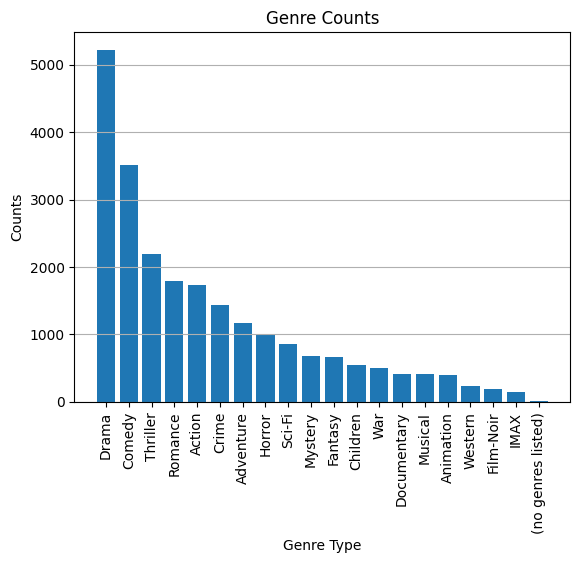

In [36]:
#movie_genres_count.plot(kind = 'bar')
#make the movie type to graph
#movie_genres_count.plot(kind='bar')
plt.bar(movie_genres_count.index,movie_genres_count.values)
plt.title('Genre Counts')
plt.xlabel('Genre Type')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

In [37]:
sorted_year_movie = movie_data['year'].value_counts().sort_index()

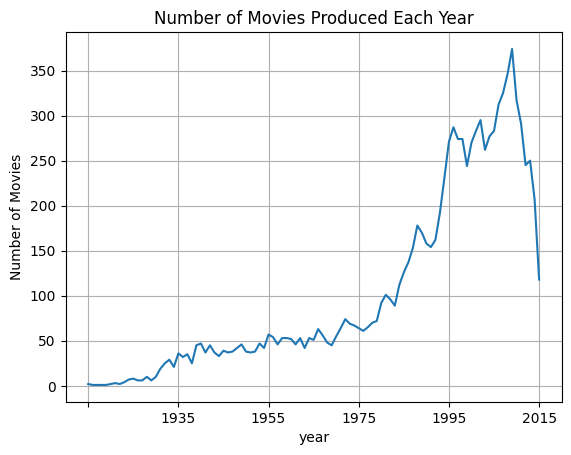

In [38]:
#I want to know the trend of how many movies they make each year
sorted_year_movie.plot(kind='line')
#sns.lineplot(x=sorted_year_movie.index, y=sorted_year_movie.values)
plt.title('Number of Movies Produced Each Year')
plt.ylabel('Number of Movies')
plt.grid(True)


In [39]:
year_genre_change = exploded_movie_data.groupby(['year','genres']).size().unstack(fill_value=0)
year_genre_change

genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
year,,,,,,,,,,,,,,,,,,,,
,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1902,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1915,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1916,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1919,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,0,65,33,14,13,82,35,26,151,19,2,28,20,4,21,30,33,86,8,2
2012,1,56,24,17,7,72,33,20,114,18,1,27,23,10,7,20,26,64,7,2
2013,0,59,32,15,8,67,39,14,121,23,1,27,28,1,16,34,30,70,4,1


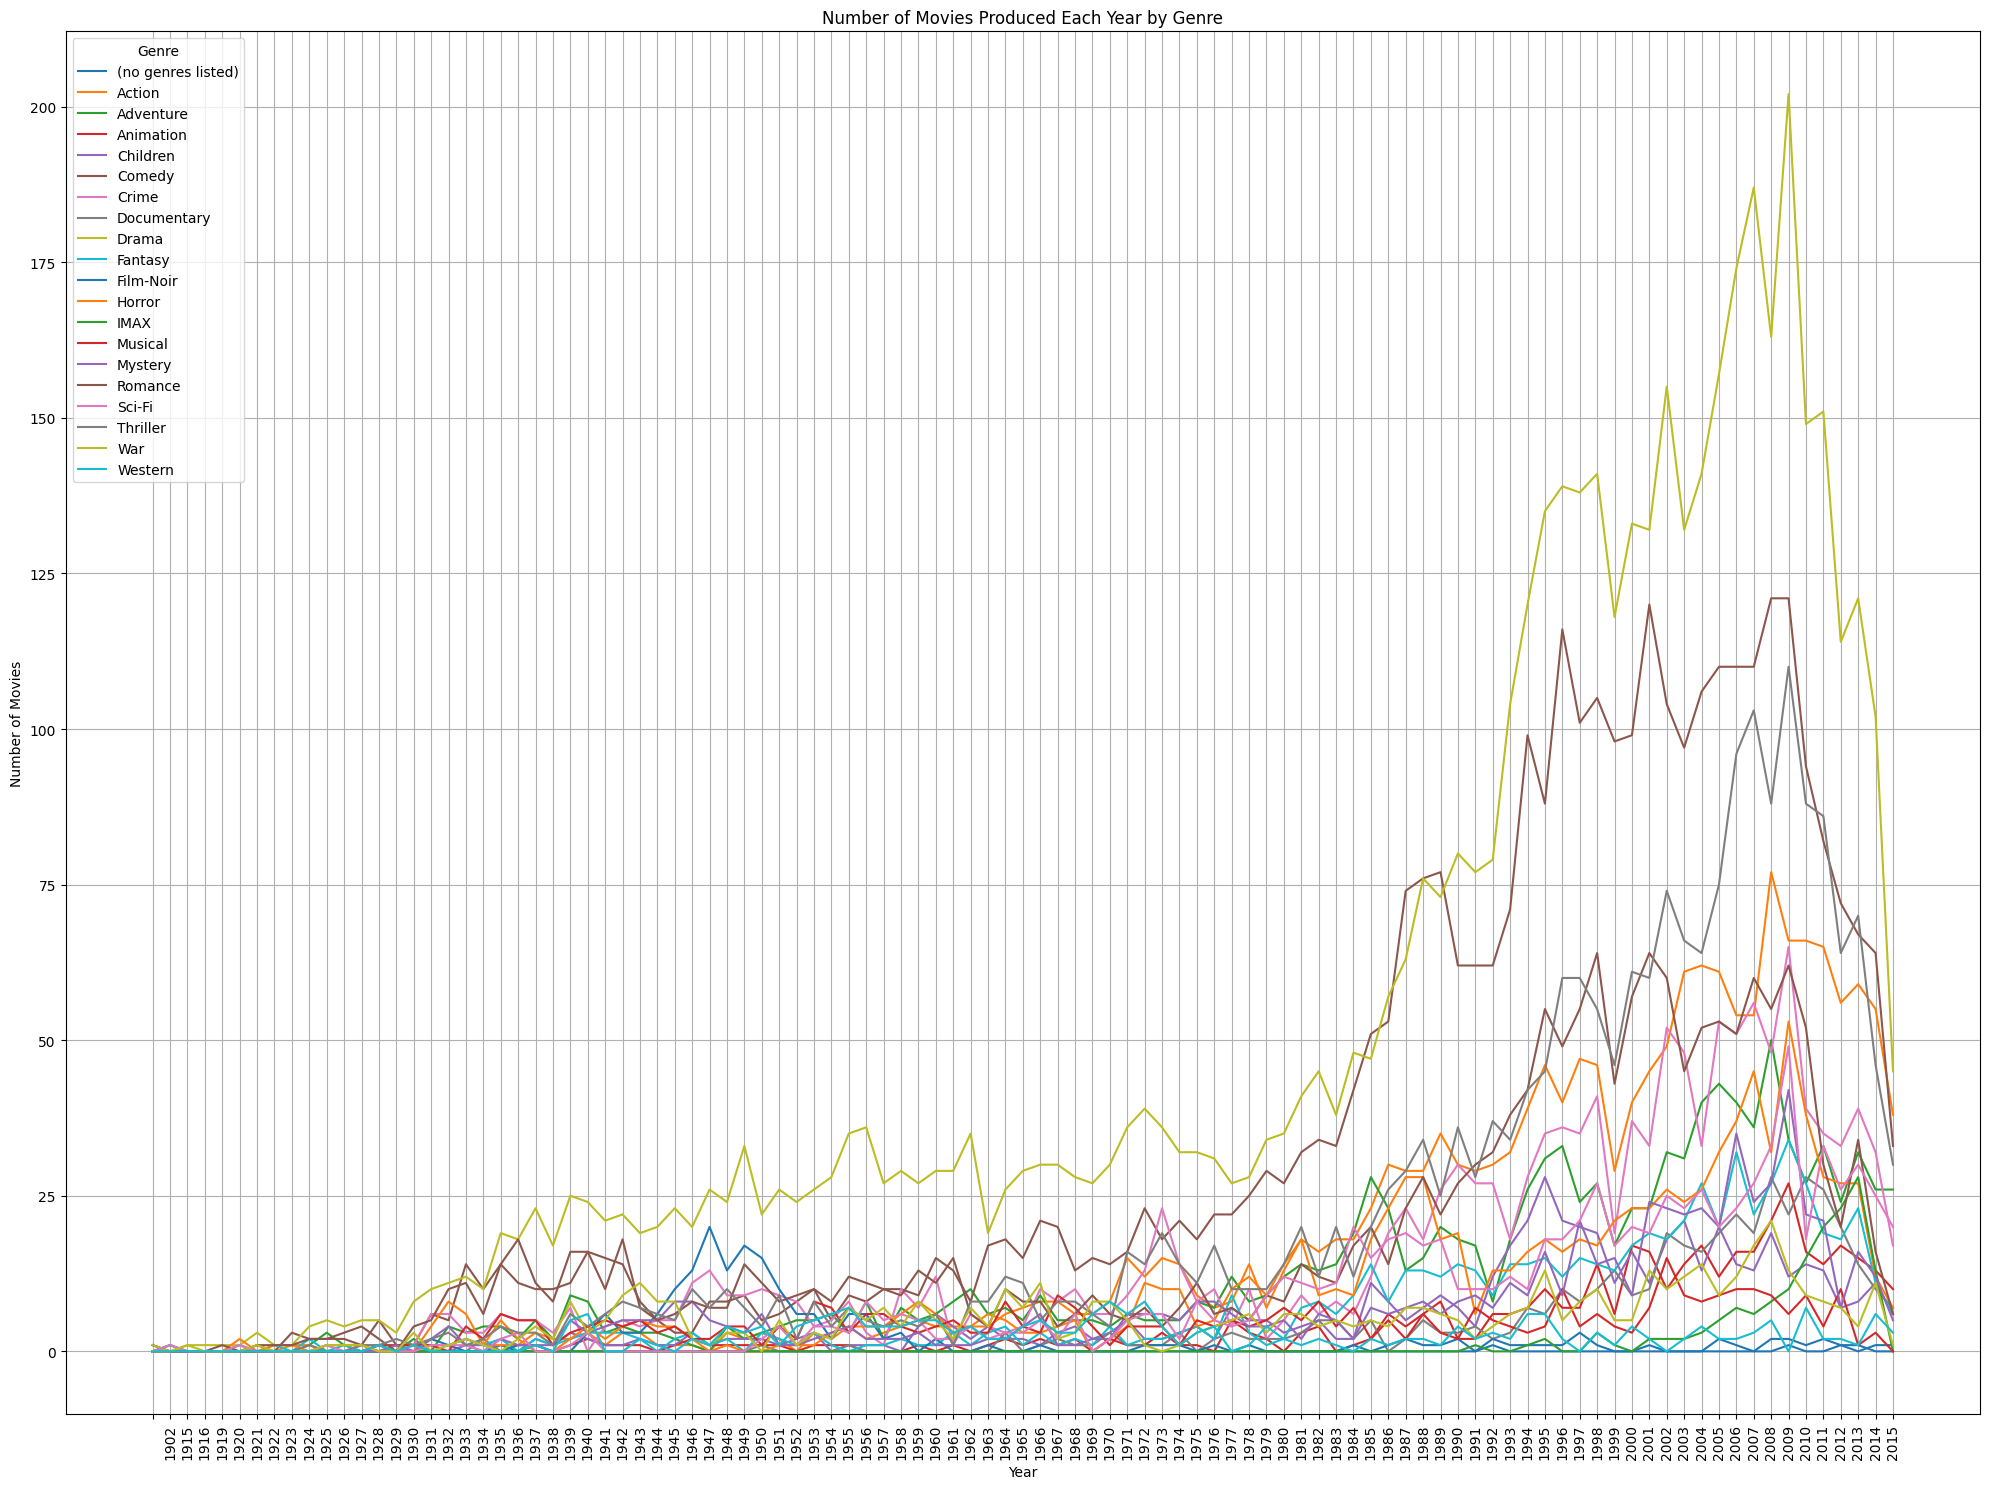

In [40]:
plt.figure(figsize=(20, 15))

#genre_year_counts.index 是年份。
#genre_year_counts[genre] 是该类型在每年的电影数量。
#label=genre 为每条线指定了标签
#获取所有的类型列
for genre in year_genre_change.columns:
    #对于每一个类型绘制一条折线。
    plt.plot(year_genre_change.index, year_genre_change[genre], label=genre)


plt.title('Number of Movies Produced Each Year by Genre')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend(title='Genre')
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

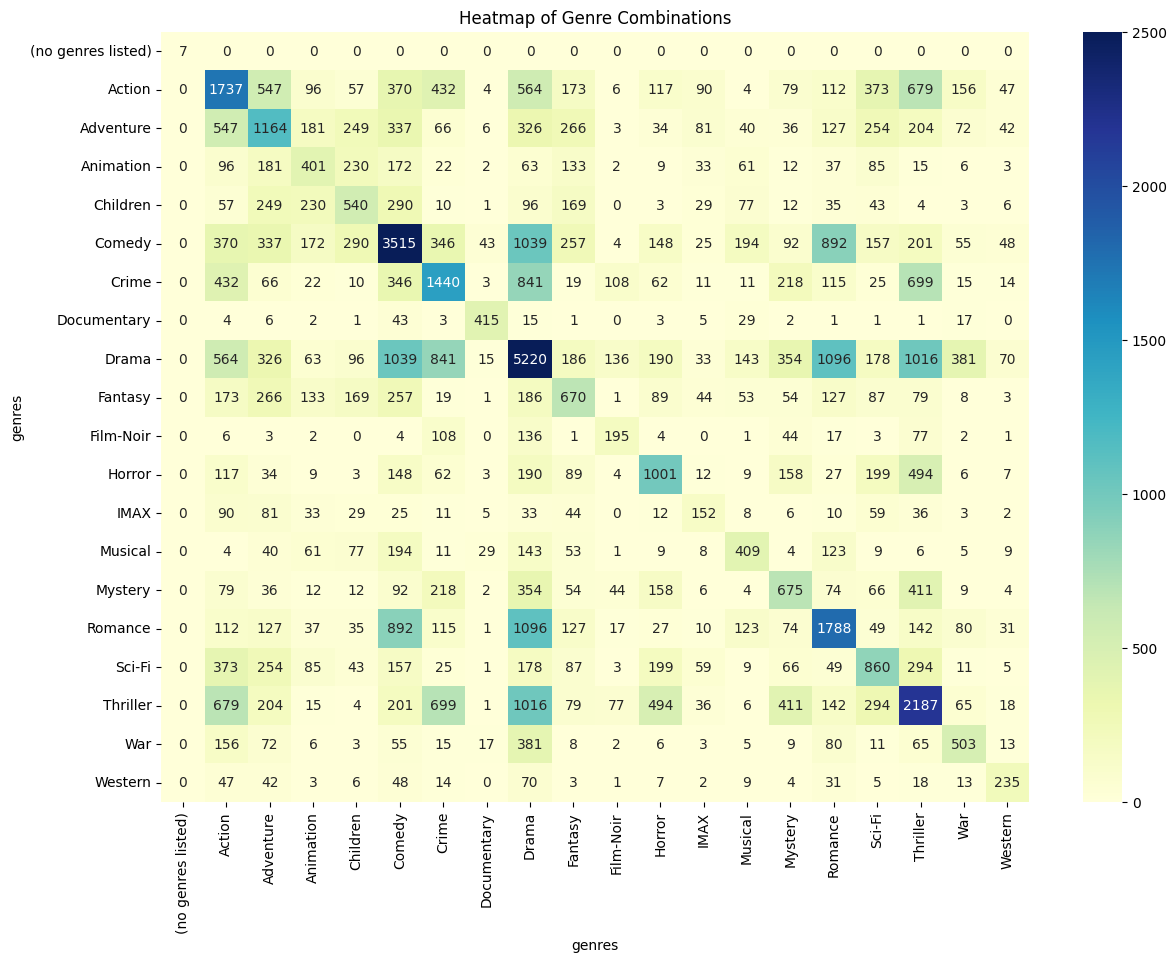

In [41]:
# Create a cross-tabulation of genres combinations
#pd.crosstab 函数用于创建一个交叉表，将ID和类型作为行和列，表格中的值表示某个电影属于某个类型的次数（在这个例子中应该是1或者0，因为每个电影属于的类型已经通过explode函数分解开了）
genre_combinations = pd.crosstab(exploded_movie_data['movieId'], exploded_movie_data['genres'])
#通过矩阵乘法计算类型组合的频率矩阵。
#genre_combinations.T：对交叉表进行转置，交换行和列。
#.dot(genre_combinations)：通过矩阵乘法，计算每种类型与其他类型组合出现的次数。
genre_combinations = genre_combinations.T.dot(genre_combinations)

# Plot the heatmap
plt.figure(figsize=(14, 10))
#annot=True：在热图的每个单元格上显示数值
#cmap='YlGnBu'：设置热图的颜色映射（黄-绿-蓝）。
sns.heatmap(genre_combinations, annot=True, fmt='d', cmap='YlGnBu', vmin=0, vmax=2500)
plt.title('Heatmap of Genre Combinations')
plt.show()

### Rating Data

In [42]:
rating_data

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523
...,...,...,...,...
105334,668,142488,4.0,1451535844
105335,668,142507,3.5,1451535889
105336,668,143385,4.0,1446388585
105337,668,144976,2.5,1448656898


In [43]:
rating_data['timestamp'].sort_values()

44794      828564954
44835      828564954
44836      828564954
44832      828564954
44838      828564954
             ...    
70395     1452287529
66811     1452347804
104444    1452370333
104655    1452370659
75993     1452404919
Name: timestamp, Length: 105339, dtype: int64

In [44]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [45]:
rating_data.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

### Rating Detail

In [46]:
rating_data.sort_values

<bound method DataFrame.sort_values of         userId  movieId  rating   timestamp
0            1       16     4.0  1217897793
1            1       24     1.5  1217895807
2            1       32     4.0  1217896246
3            1       47     4.0  1217896556
4            1       50     4.0  1217896523
...        ...      ...     ...         ...
105334     668   142488     4.0  1451535844
105335     668   142507     3.5  1451535889
105336     668   143385     4.0  1446388585
105337     668   144976     2.5  1448656898
105338     668   148626     4.5  1451148148

[105339 rows x 4 columns]>

In [47]:
rat_ave = rating_data.groupby('movieId')['rating'].mean()
#rat_ave.rename({'rating': 'average_rating'}, inplace=True)
movie_ave_rating = pd.merge(movie_data, rat_ave, on='movieId', how='left')

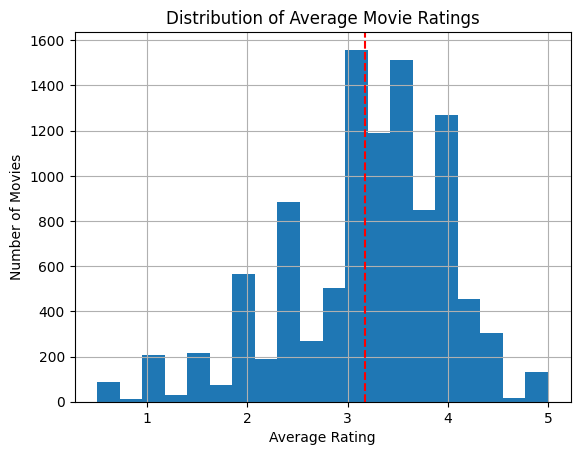

In [79]:
movie_ave_rating['rating'].round(1).hist(bins=20)
average_rat = movie_ave_rating['rating'].mean()
plt.axvline(average_rat, color='red', linestyle='--', label=f'Average Rating: {average_rat:.2f}')
plt.title('Distribution of Average Movie Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Number of Movies')
plt.show()

In [49]:
# Calculate the number of ratings for each movie
rating_counts = rating_data.groupby('movieId')['rating'].count().reset_index()
rating_counts.rename(columns={'rating': 'rating_count'}, inplace=True)

movie_rating_count = pd.merge(movie_data,rating_counts,on = 'movieId',how='left')

In [50]:
#top 100 popular movie
top100=movie_rating_count.sort_values(by='rating_count',ascending=False).head(100)

In [51]:
#To know in this 100 movies, genres distribution
exploded_top100 = top100.explode('genres')
combinations_top100 = pd.crosstab(exploded_top100['name'], exploded_top100['genres'])
combinations_top100 = combinations_top100.T.dot(combinations_top100)

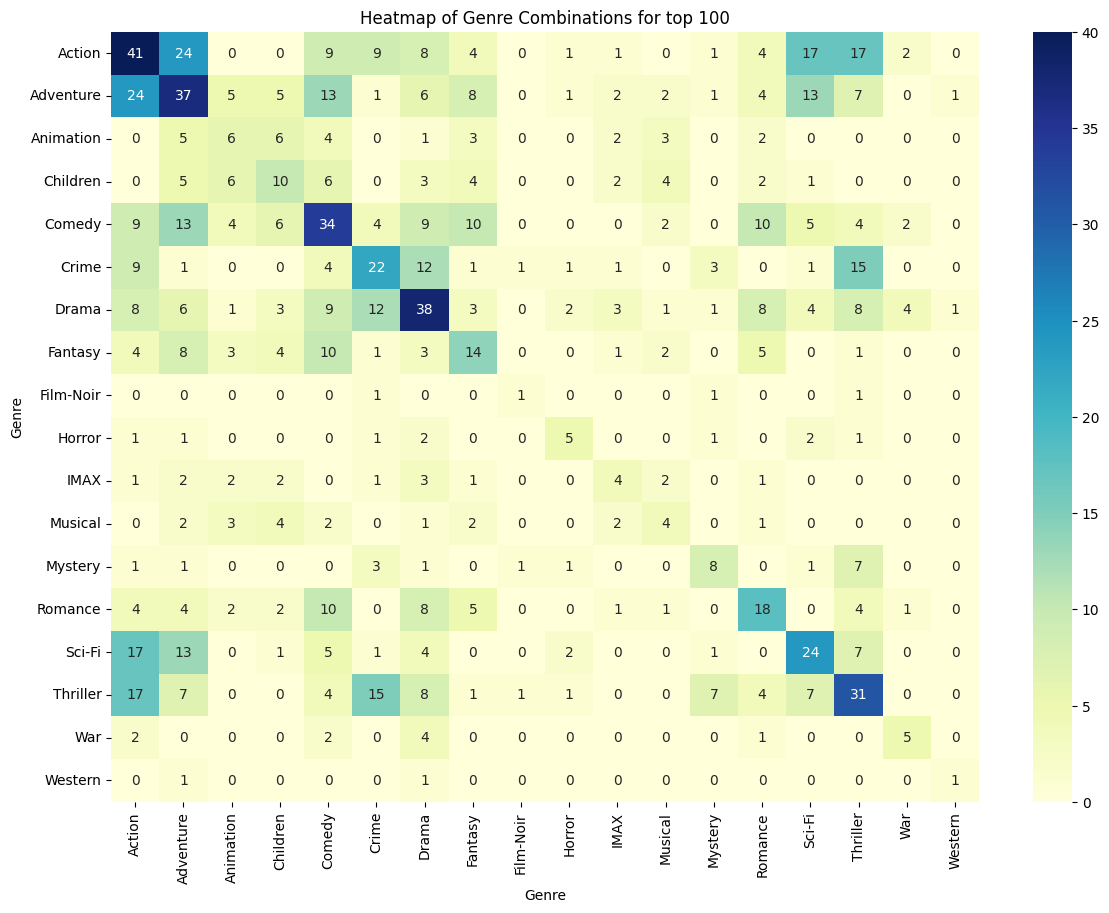

In [52]:

plt.figure(figsize=(14, 10))
sns.heatmap(combinations_top100, annot=True, fmt='d', cmap='YlGnBu', vmin=0, vmax=40)
plt.title('Heatmap of Genre Combinations for top 100')
plt.xlabel('Genre')
plt.ylabel('Genre')
plt.show()

In [53]:
#rating distribution for top 100
top100.head()

,movieId,name,year,genres,rating_count
260,296,Pulp Fiction,1994,"[Comedy, Crime, Drama, Thriller]",325.0
316,356,Forrest Gump,1994,"[Comedy, Drama, Romance, War]",311.0
279,318,"Shawshank Redemption, The",1994,"[Crime, Drama]",308.0
426,480,Jurassic Park,1993,"[Action, Adventure, Sci-Fi, Thriller]",294.0
525,593,"Silence of the Lambs, The",1991,"[Crime, Horror, Thriller]",290.0


In [54]:
movie_ave_rating.head()

,movieId,name,year,genres,rating
0,1,Toy Story,1995,"[Adventure, Animation, Children, Comedy, Fantasy]",3.907328
1,2,Jumanji,1995,"[Adventure, Children, Fantasy]",3.353261
2,3,Grumpier Old Men,1995,"[Comedy, Romance]",3.189655
3,4,Waiting to Exhale,1995,"[Comedy, Drama, Romance]",2.818182
4,5,Father of the Bride Part II,1995,[Comedy],3.250000


In [55]:
# 只保留 rating_data 中 movieId 在 top100 中的记录
top100_fix = movie_ave_rating[movie_ave_rating['movieId'].isin(top100['movieId'])]

In [73]:
top100_with_rating = pd.merge(top100_fix[['movieId', 'rating']],top100[['movieId', 'name', 'year', 'genres', 'rating_count']],on='movieId',how='inner')
top100_with_rating.sort_values(by = ['rating'],ascending=False).head(40)

,movieId,rating,name,year,genres,rating_count
18,318,4.454545,"Shawshank Redemption, The",1994,"[Crime, Drama]",308.0
48,858,4.392857,"Godfather, The",1972,"[Crime, Drama]",210.0
5,50,4.328947,"Usual Suspects, The",1995,"[Crime, Mystery, Thriller]",228.0
55,1136,4.301948,Monty Python and the Holy Grail,1975,"[Adventure, Comedy, Fantasy]",154.0
30,527,4.296371,Schindler's List,1993,"[Drama, War]",248.0
56,1193,4.272727,One Flew Over the Cuckoo's Nest,1975,[Drama],143.0
42,608,4.271144,Fargo,1996,"[Comedy, Crime, Drama, Thriller]",201.0
79,2571,4.264368,"Matrix, The",1999,"[Action, Sci-Fi, Thriller]",261.0
65,1221,4.260714,"Godfather: Part II, The",1974,"[Crime, Drama]",140.0
63,1213,4.259259,Goodfellas,1990,"[Crime, Drama]",135.0


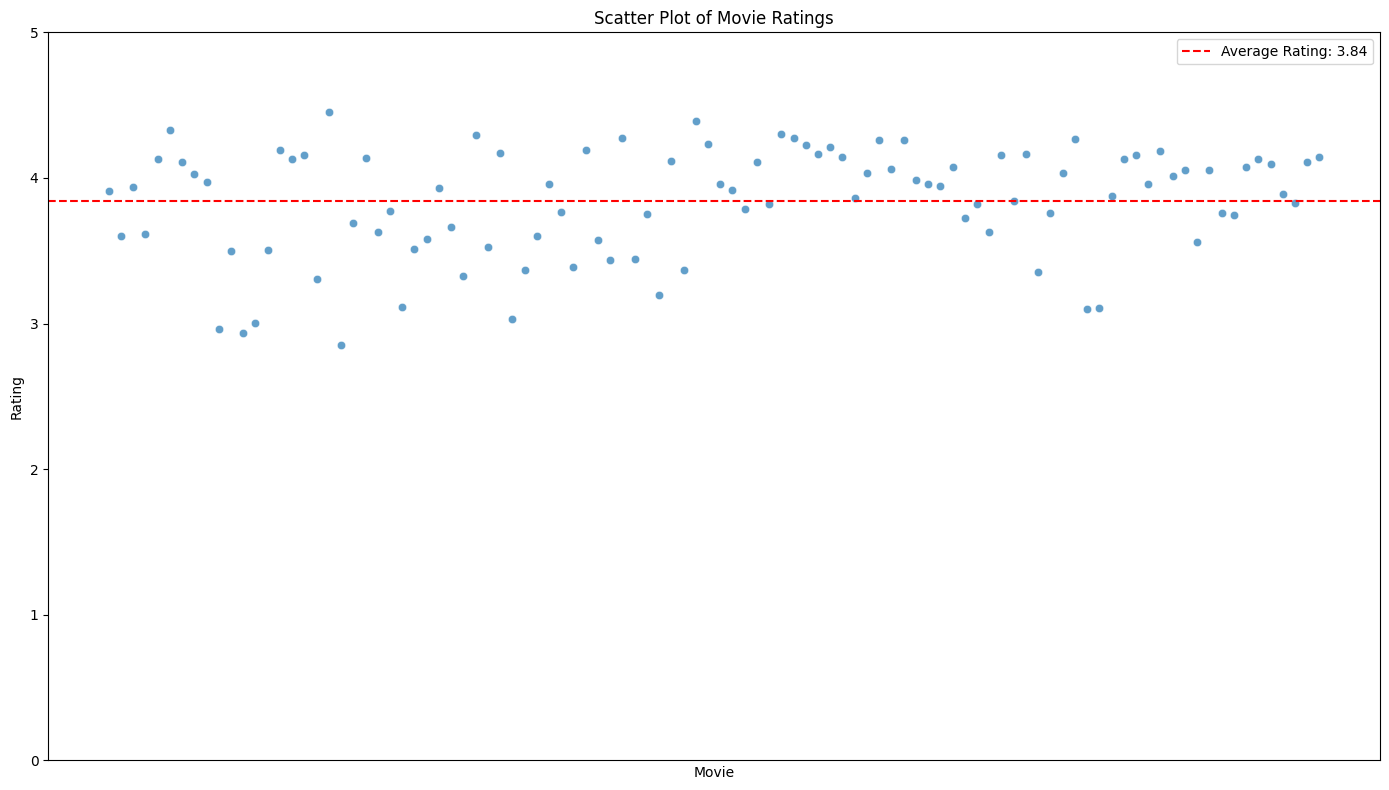

In [163]:
plt.figure(figsize=(14, 8))
average_rating = top100_with_rating['rating'].mean()
plt.axhline(average_rating, color='red', linestyle='--', label=f'Average Rating: {average_rating:.2f}')
sns.scatterplot(data=top100_with_rating, x='name', y='rating', alpha=0.7)
plt.title('Scatter Plot of Movie Ratings')
plt.xlabel('Movie')
plt.ylabel('Rating')
plt.ylim(0, 5)
plt.xticks([])
plt.tight_layout()
plt.show()